<a href="https://colab.research.google.com/github/sushirito/Molecular-Dynamics/blob/OpenMM/OpenMM_Scripting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**NOTE**: Code must be run twice to work

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()  # Will restart the runtime; re-run after restart

!mamba install -c conda-forge ambertools -y

✨🍰✨ Everything looks OK!

Looking for: ['ambertools']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  - python_abi 3.11.* *cp311*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



In [ ]:
!git clone https://github.com/Iourarum/GOPY.git
%cd GOPY
!python GOPY.py generate_PG 10 10 graphene.pdb
!python GOPY.py generate_GO graphene.pdb 2 4 8 functionalized.pdb


Cloning into 'GOPY'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 197 (delta 39), reused 18 (delta 18), pack-reused 150 (from 1)
Receiving objects: 100% (197/197), 9.50 MiB | 15.37 MiB/s, done.
Resolving deltas: 100% (99/99), done.
/content/GOPY/GOPY
done.
GOPY.py
generate_GO
graphene.pdb
2
4
8
functionalized.pdb
Left to add:  cooh:  2 epoxy:  4 hydroxyl:  8
Left to add:  cooh:  2 epoxy:  4 hydroxyl:  7
Left to add:  cooh:  2 epoxy:  3 hydroxyl:  7
Left to add:  cooh:  2 epoxy:  3 hydroxyl:  6
Left to add:  cooh:  2 epoxy:  3 hydroxyl:  5
Left to add:  cooh:  1 epoxy:  3 hydroxyl:  5
Left to add:  cooh:  1 epoxy:  2 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  2 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  1 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  0 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  0 hydroxyl:  4
Left to add:  cooh:  0 epoxy:  0 hydroxyl:  3
Left to add:  cooh:  0 epox

In [ ]:
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/GGG.lib
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/C1A.lib
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/E1A.lib
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/H1A.lib
!mkdir -p FRCMOD
!wget -P FRCMOD https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/FRCMOD/GO.frcmod

--2025-01-21 06:23:37--  https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/GGG.lib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063 (1.0K) [text/plain]
Saving to: ‘GGG.lib’

GGG.lib             100%[===================>]   1.04K  --.-KB/s    in 0s      

2025-01-21 06:23:37 (54.5 MB/s) - ‘GGG.lib’ saved [1063/1063]

--2025-01-21 06:23:37--  https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/C1A.lib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1627 (1.6K) [text/plain]
Saving to: ‘C1A.lib’

C1

%%bash
cat > leap.in <<EOF
source leaprc.protein.ff14SB
source leaprc.water.tip3p

loadoff GGG.lib
loadoff C1A.lib
loadoff E1A.lib
loadoff H1A.lib
loadamberparams FRCMOD/GO.frcmod

mol = loadpdb functionalized.pdb
bondbydistance mol

solvateBox mol TIP3PBOX 10.0

addIons2 mol Na+ 0
addIons2 mol Cl- 0

saveamberparm mol mol_solv.prmtop mol_solv.inpcrd
quit
EOF
tleap -f leap.in


In [24]:
%%bash
cat > leap.in <<EOF
source leaprc.protein.ff14SB
source leaprc.water.tip3p

loadoff GGG.lib
loadoff C1A.lib
loadoff E1A.lib
loadoff H1A.lib
loadamberparams FRCMOD/GO.frcmod

mol = loadpdb functionalized.pdb
bondbydistance mol

solvateBox mol TIP3PBOX 5.0 # (5 Å box)

addIons2 mol Na+ 50
addIons2 mol Cl- 50

saveamberparm mol mol_solv.prmtop mol_solv.inpcrd
quit
EOF
tleap -f leap.in


-I: Adding /usr/local/dat/leap/prep to search path.
-I: Adding /usr/local/dat/leap/lib to search path.
-I: Adding /usr/local/dat/leap/parm to search path.
-I: Adding /usr/local/dat/leap/cmd to search path.
-f: Source leap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./leap.in
----- Source: /usr/local/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /usr/local/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /usr/local/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /usr/local/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading title:
ff14SB protein backbone and sidechain parameters
Loading library: /usr/local/dat/leap/lib/amino12.lib
Loading library: /usr/local/dat/leap/lib/aminoct12.lib
Loading library: /usr/local/dat/leap/lib/aminont12.lib
----- Source: /usr/local/dat/leap/cmd/leaprc.water.tip3p
----- Source of /usr/local/dat/leap/cmd/

In [ ]:
!pip install openmm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 104.9 MB/s eta 0:00:00


In [25]:
from openmm.app import AmberPrmtopFile, AmberInpcrdFile, Simulation, PDBReporter, PME, HBonds
from openmm import LangevinMiddleIntegrator, Platform
from openmm.unit import *

# Load solvated system
prmtop = AmberPrmtopFile('mol_solv.prmtop')
inpcrd = AmberInpcrdFile('mol_solv.inpcrd')
topology = prmtop.topology
positions = inpcrd.positions

# Create system and integrator
system = prmtop.createSystem(nonbondedMethod=PME,
                             nonbondedCutoff=1.0*nanometer,
                             constraints=HBonds)
integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.004*picoseconds)

# Select CPU platform
platform = Platform.getPlatformByName('CPU')

# Set up simulation
simulation = Simulation(topology, system, integrator, platform)
simulation.context.setPositions(positions)

# Energy minimization
simulation.minimizeEnergy()

# Add a PDBReporter to save each frame
simulation.reporters.append(PDBReporter('trajectory.pdb', 100))

# Run 5000 timesteps
simulation.step(5000)

print("Simulation complete. Trajectory saved to trajectory.pdb.")


Simulation complete. Trajectory saved to trajectory.pdb.


In [26]:
from google.colab import files

# Download the file to your local computer
files.download('trajectory.pdb')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!pip install MDAnalysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 97.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/site-packages/MDAnalysis/analysis/base.py:522: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time
/usr/local/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


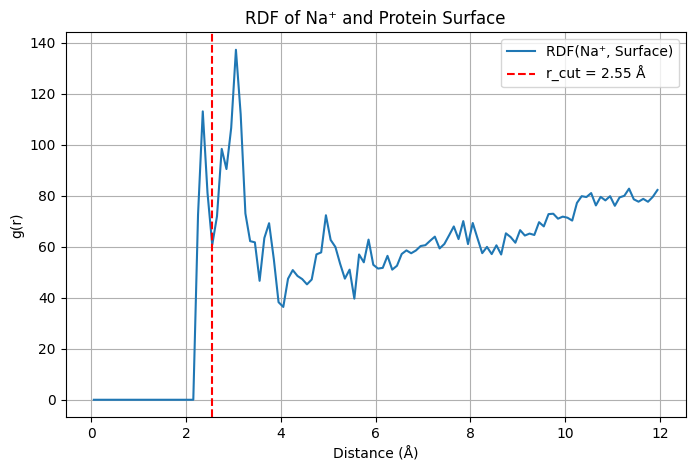

In [27]:
import os
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Load the trajectory and topology
u = mda.Universe('mol_solv.prmtop', 'trajectory.pdb')

# Manually set static dimensions for each frame to avoid zero-volume issues
for ts in u.trajectory:
    ts.dimensions = [150.0, 150.0, 100.0, 90.0, 90.0, 90.0]  # Set [Lx, Ly, Lz, alpha, beta, gamma]
u.trajectory.rewind()

# Select protein surface (GGG, E1A, H1A, C1A) and Na⁺ atoms
protein = u.select_atoms('resname GGG E1A H1A C1A')
Na = u.select_atoms('name Na+')  # Sodium ion selection

# Compute RDF between protein surface and Na⁺
r_min, r_max = 0.0, 12.0
rdf_calc = InterRDF(protein, Na, range=(r_min, r_max), nbins=120)
rdf_calc.run()

r = rdf_calc.bins
rdf = rdf_calc.rdf

# Identify first peak and subsequent minima to determine r_cut
peaks, _ = find_peaks(rdf)
if len(peaks) > 0:
    first_peak = peaks[0]
    inverted = -rdf
    minima, _ = find_peaks(inverted, distance=10)
    cands = minima[minima > first_peak]
    r_cut = r[cands[0]] if len(cands) > 0 else r_max
else:
    r_cut = r_max

# Plot RDF and mark r_cut
plt.figure(figsize=(8, 5))
plt.plot(r, rdf, label='RDF(Na⁺, Surface)')
plt.axvline(x=r_cut, color='r', linestyle='--', label=f'r_cut = {r_cut:.2f} Å')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.title('RDF of Na⁺ and Protein Surface')
plt.legend()
plt.grid(True)
plt.show()